# Módulo 5 - Técnicas de Programação II
## Aula 5
- Gráficos com Seaborn
- Exercícios

## Gráficos com Seaborn
Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.
  
**Documentação**: https://seaborn.pydata.org/  
**Paleta de cores**: https://seaborn.pydata.org/tutorial/color_palettes.html

### Instalação
Caso não tenha instalado o pacote do **Seaborn** ou está na dúvida, basta rodar o seguinte código:

In [4]:
#!pip install seaborn

### Import da biblioteca
  
Como já é padrão importaremos a biblioteca seaborn. Diferentemente do matplotlib e plotly, não será necessário indicar um submódulo.

In [5]:
import seaborn as sns

Novamente iniciaremos a notação de entendimento da biblioteca com um exemplo simples com apenas duas listas, *x* e *y*, contenco alguns pontos. Para utilizar o **seaborn** basta chamá-lo por meio do alias sns seguido do tipo de gráfico desejado.

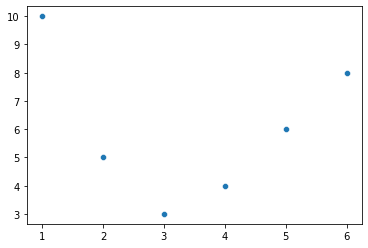

In [6]:
x = [1, 2, 3, 4, 5 ,6]
y = [10, 5, 3, 4, 6, 8]
sns.scatterplot(x=x,y=y);

Você pode notar que o gráfico é extremamente semelhante ao proveniente do matplotlib, o que não é por acaso, visto que o seaborn é baseado no próprio matplotlib.

Vamos importar também outros pacotes padrões

In [7]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Scatter (dispersão)
**Documentação**: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

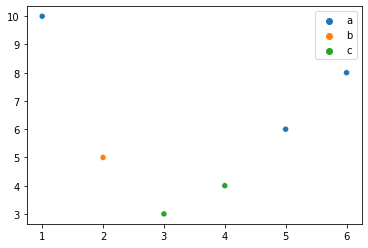

In [8]:
x = [1, 2, 3, 4, 5 ,6]
y = [10, 5, 3, 4, 6, 8]
z=['a', 'b', 'c', 'c', 'a', 'a']
sns.scatterplot(x=x,
                y=y,
                hue=z);

Importando o dataset dos pinguins

In [9]:
df_size = pd.read_csv('data/penguins_size.csv', sep=',')
df_size.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

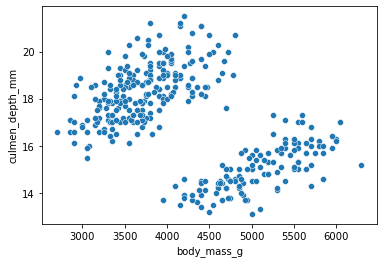

In [10]:
sns.scatterplot(data=df_size, x='body_mass_g', y='culmen_depth_mm');

Podemos alterar as cores dos marcadores através de alguma variável do próprio dataframe como por exemplo o sexo dos pinguins.  O parâmetro *hue* é responsável pela mudança das cores na marcação dos pontos por meio de uma das colunas do próprio dataframe.

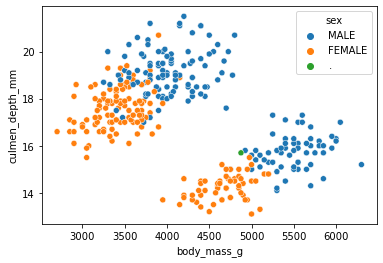

In [11]:
sns.scatterplot(data=df_size, x='body_mass_g', y='culmen_depth_mm', hue='sex');

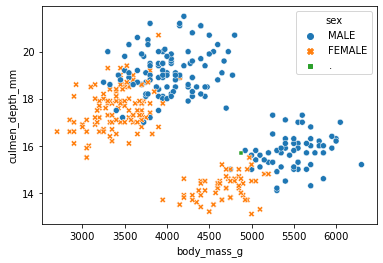

In [12]:
sns.scatterplot(data=df_size, x='body_mass_g', y='culmen_depth_mm', hue='sex', style='sex');

Estilizando o gráfico.

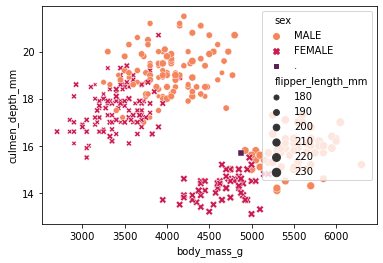

In [13]:
sns.scatterplot(data=df_size,
                x='body_mass_g', 
                y='culmen_depth_mm',
                hue='sex', 
                style='sex',
                palette='rocket_r', 
                size='flipper_length_mm');

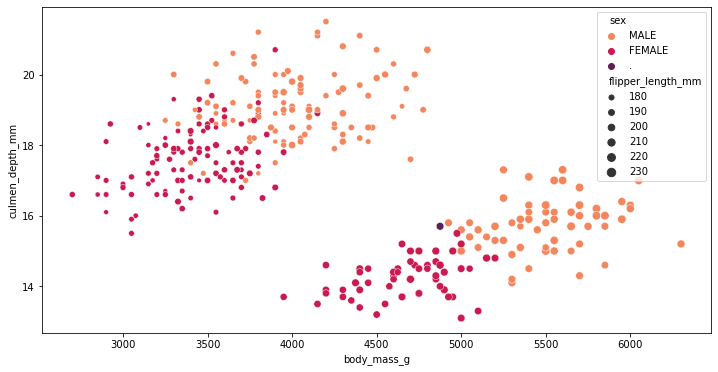

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_size,
                x='body_mass_g',
                y='culmen_depth_mm', 
                hue='sex',
                palette='rocket_r',
                size='flipper_length_mm');

O Seaborn possui uma plotagem semelhante ao scatter, porém feito automaticamente com todas as variáveis contínuas, o **pairplot**

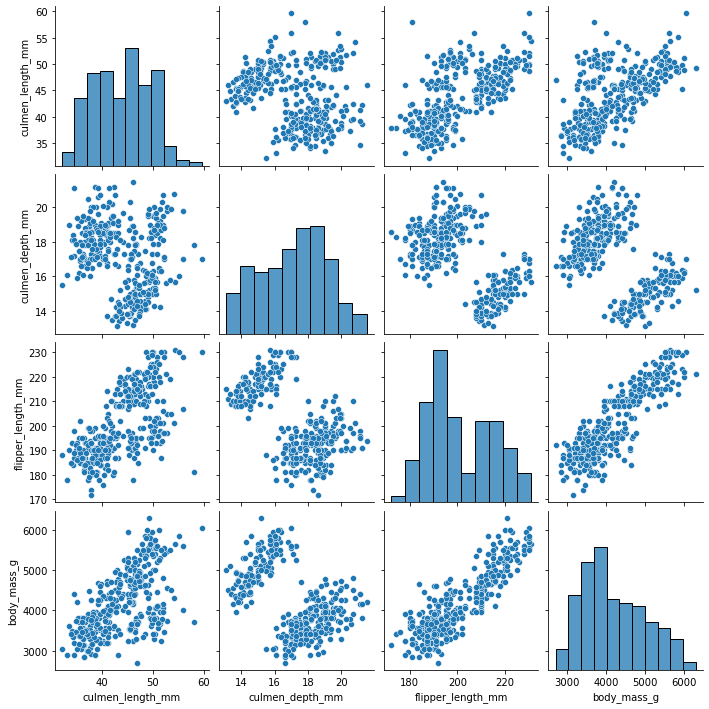

In [15]:
sns.pairplot(data=df_size);

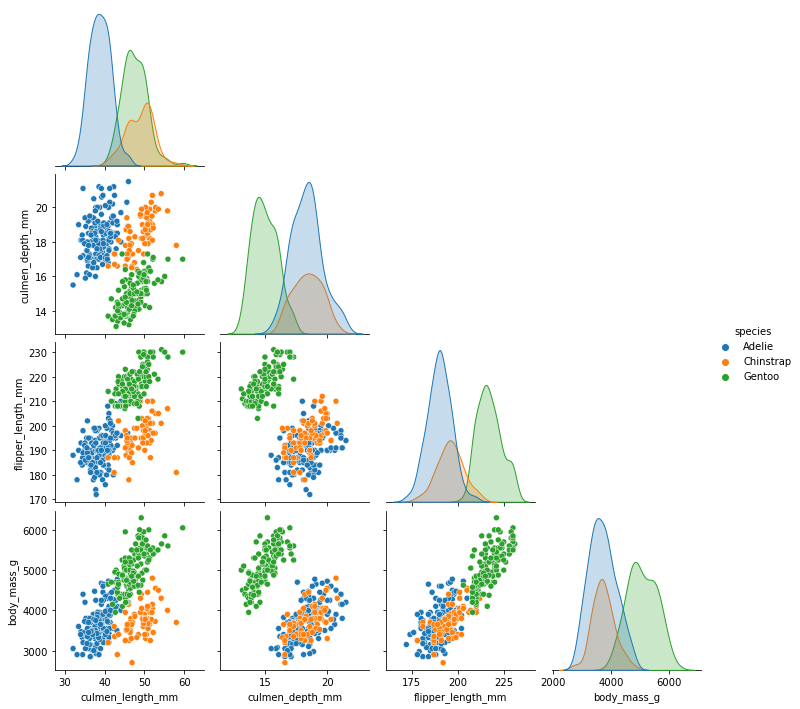

In [16]:
sns.pairplot(data=df_size, hue='species', corner=True);

## Linhas
**Documentação**: https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [17]:
df_supermarket = pd.read_csv('.\data\supermarket_sales.csv')
df_supermarket.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [18]:
df_supermarket['Date'] = pd.to_datetime(df_supermarket['Date'])

Na última aula nós tentamos criar um gráfico com o dataframe todo, porém como havia diversos pontos na mesma data, não foi possível visualizar a informação. O Seaborn trata esta questão de forma automática. A linha azul mais escura representa a *média* dos valores dentro do mesmo dia e o sombreado o intervalo com 95% de confiança.

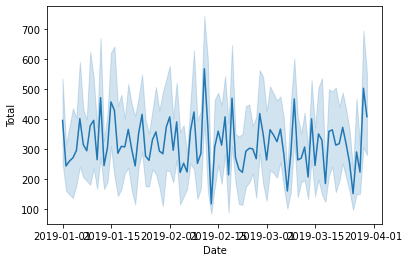

In [19]:
sns.lineplot(data=df_supermarket, x='Date', y='Total');

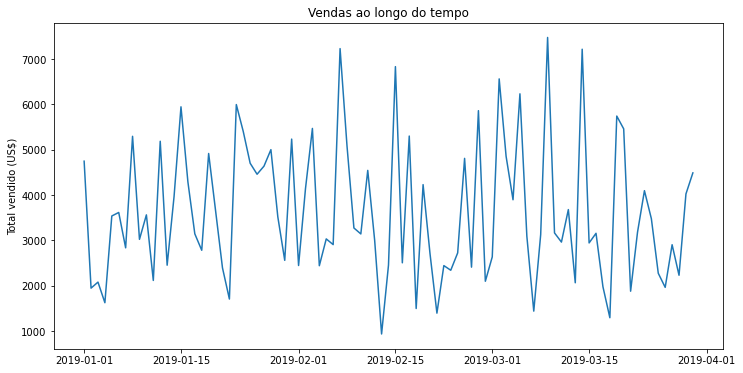

In [20]:
df_total=df_supermarket.pivot_table(index='Date', values='Total', aggfunc='sum')

plt.figure(figsize=(12,6))

ax = sns.lineplot(x=df_total.index, y=df_total['Total'])

ax.set_title('Vendas ao longo do tempo')
ax.set_ylabel('Total vendido (US$)')
ax.set_xlabel('');

**No mesmo Eixo**

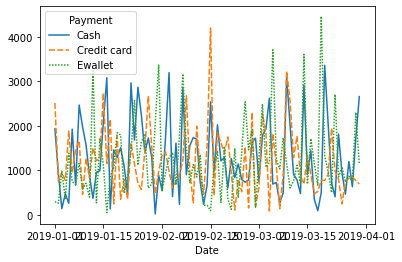

In [21]:
df_payment=df_supermarket.pivot_table(index='Date', columns='Payment', values='Total', aggfunc='sum')
sns.lineplot(data=df_payment);

Podemos estilizar o gráfico

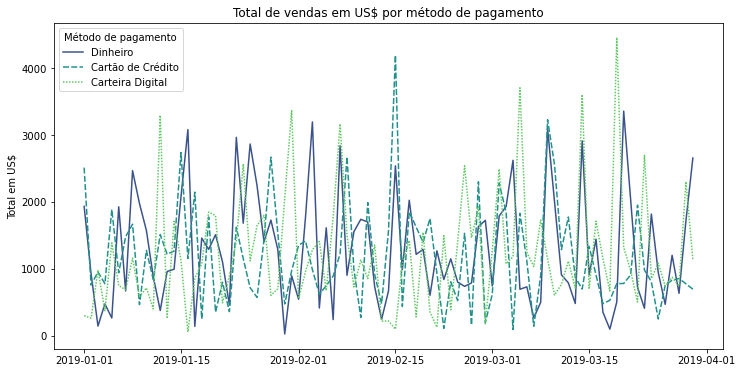

In [22]:
df_payment=df_supermarket.pivot_table(index='Date', columns='Payment', values='Total', aggfunc='sum')

plt.figure(figsize=(12,6))
ax=sns.lineplot(data=df_payment, palette='viridis')

ax.set_title('Total de vendas em US$ por método de pagamento')
ax.set_xlabel('')
ax.set_ylabel('Total em US$')
ax.legend(['Dinheiro', 'Cartão de Crédito', 'Carteira Digital'], loc='upper left', title='Método de pagamento');

**Em vários eixos**  
Para realizar o plot do gráfico acima, porém agora em três gráficos separados, é possível utilizar o **subplots** do matplotlib e posteriormente passar cada um dos eixos criados para dentro do gráfico do **seaborn** com o parâmetro *ax*.

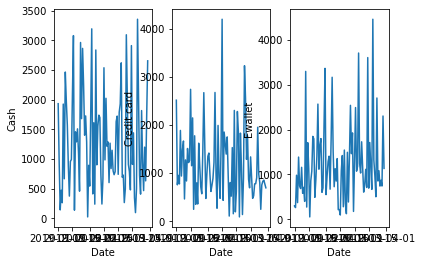

In [23]:
df_payment.reset_index(inplace=True)

fig, ax = plt.subplots(1, 3)

sns.lineplot(data=df_payment, x='Date', y='Cash', ax=ax[0])
sns.lineplot(data=df_payment, x='Date', y='Credit card', ax=ax[1])
sns.lineplot(data=df_payment, x='Date', y='Ewallet', ax=ax[2]);

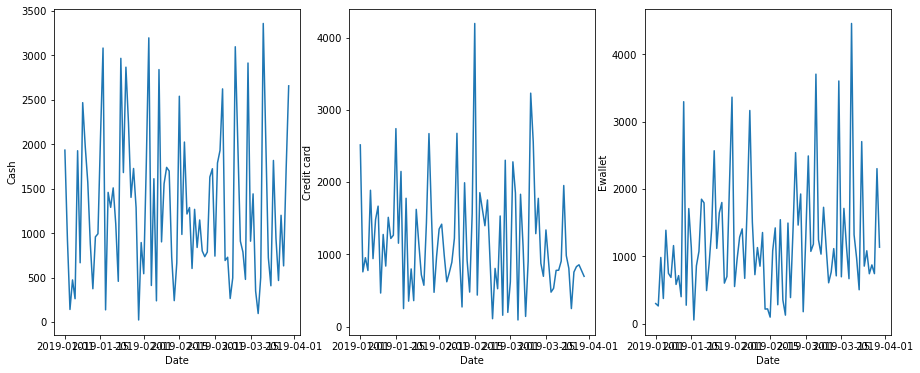

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))

sns.lineplot(data=df_payment, x='Date', y='Cash', ax=ax[0])
sns.lineplot(data=df_payment, x='Date', y='Credit card', ax=ax[1])
sns.lineplot(data=df_payment, x='Date', y='Ewallet', ax=ax[2]);

Perceba que mesmo aumentando a figura não foi possível identificar de forma legível as informações do eixo x (datas), por isso realizar os subplots com 3 linhas e apenas 1 coluna pode tornar o gráfico melhor para leitura.

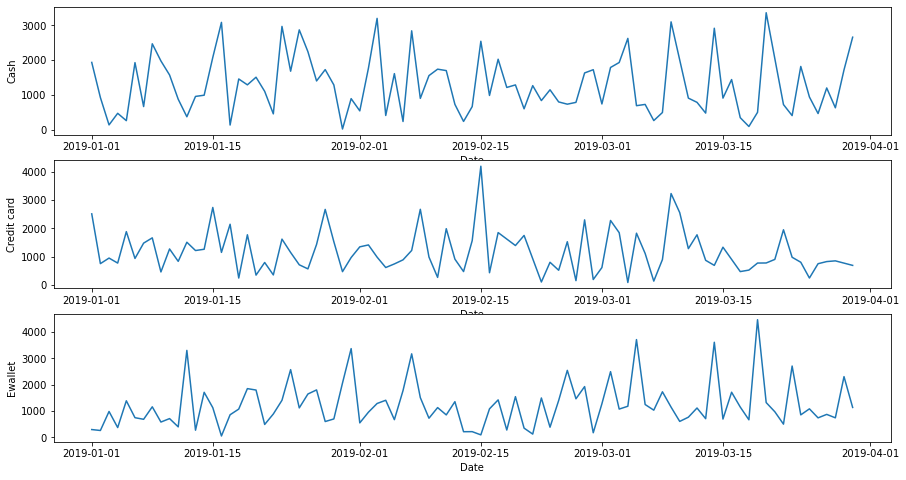

In [25]:
fig, ax = plt.subplots(3, 1, figsize=(15,8))

sns.lineplot(data=df_payment, x='Date', y='Cash', ax=ax[0])
sns.lineplot(data=df_payment, x='Date', y='Credit card', ax=ax[1])
sns.lineplot(data=df_payment, x='Date', y='Ewallet', ax=ax[2]);

## Pizza
**Documentação**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

In [26]:
df_pizza=df_supermarket.pivot_table(index='Branch', values='Quantity', aggfunc='sum');

## Barras
**Documentação**: https://seaborn.pydata.org/generated/seaborn.barplot.html

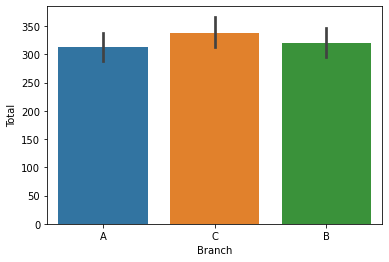

In [27]:
sns.barplot(data=df_supermarket, x='Branch', y='Total');

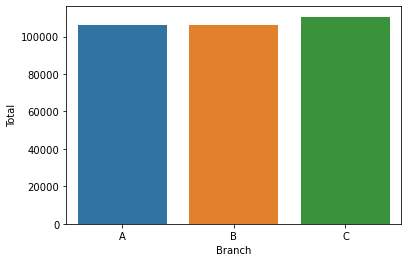

In [28]:
df_bar_1 = df_supermarket.pivot_table(index='Branch', values='Total', aggfunc='sum')
df_bar_1.reset_index(inplace=True)

sns.barplot(data=df_bar_1, x='Branch', y='Total');

In [29]:
df_supermarket.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

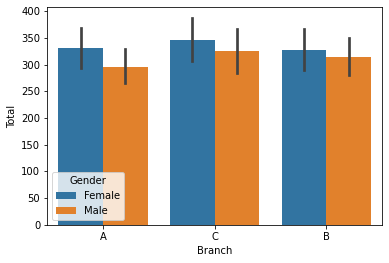

In [30]:
sns.barplot(data=df_supermarket, 
            x='Branch',
            y='Total',
            hue='Gender');

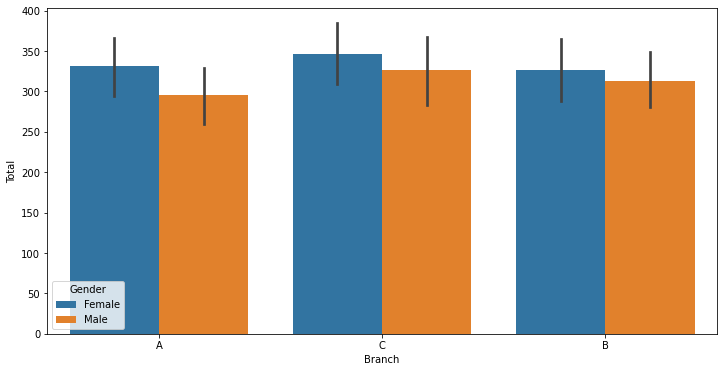

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_supermarket, x='Branch', y='Total', hue='Gender');

**Barras Horizontais**
Para criar o gráfico de barras horizontais basta alterar a ordem dos parâmetros *x* e *y*.

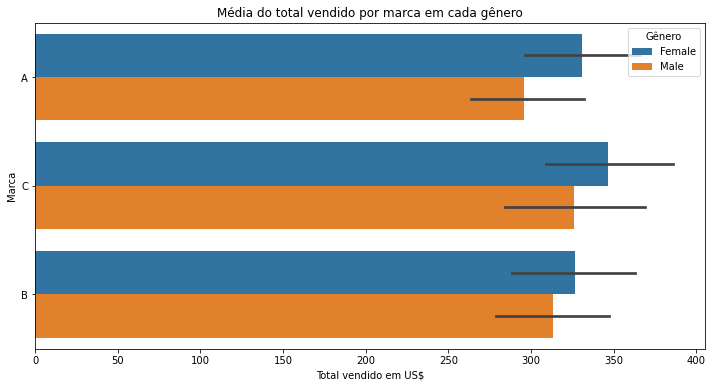

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_supermarket, y='Branch', x='Total', hue='Gender')

#MANTER SOMENTE NO GABARITO
plt.title('Média do total vendido por marca em cada gênero')
plt.ylabel('Marca')
plt.xlabel('Total vendido em US$')
plt.legend(loc='upper right', title='Gênero');

## Histograma
**Documentação**: https://seaborn.pydata.org/generated/seaborn.histplot.html

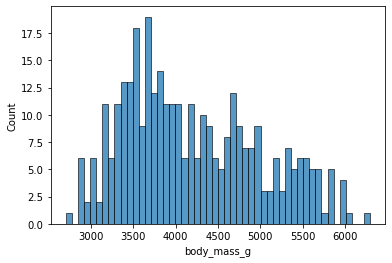

In [33]:
sns.histplot(data=df_size, x='body_mass_g', bins=50);

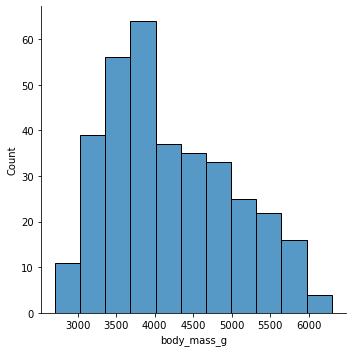

In [58]:
sns.displot(x=df_size['body_mass_g']);

## Boxplot
**Documentação**: https://seaborn.pydata.org/generated/seaborn.boxplot.html

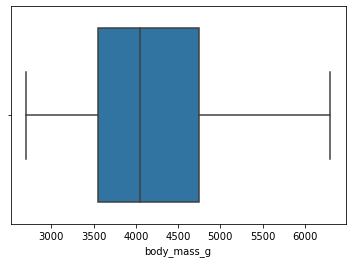

In [35]:
sns.boxplot(data=df_size, x='body_mass_g');

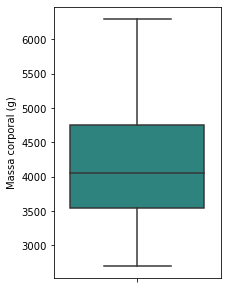

In [36]:
plt.figure(figsize=(3,5))
sns.boxplot(data=df_size, y='body_mass_g', palette='viridis')

plt.ylabel('Massa corporal (g)');

## Heatmap
**Documentação**: https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [37]:
df_corr=df_size[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
corr=df_corr.corr()
corr

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_depth_mm      -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000

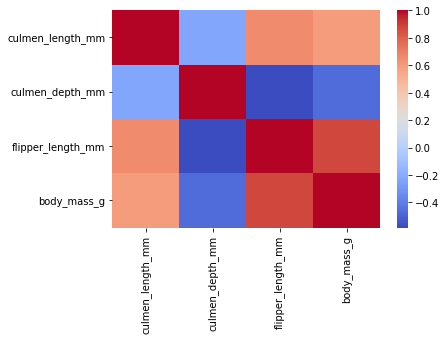

In [38]:
sns.heatmap(corr, cmap='coolwarm');

## Exercício
Agora é hora de praticar!  
  
O conjunto de dados foi baixado da UCI Machine Learning Repository.

Originalmente existiam dois dataframes relacionados com variantes tinto e branco do vinho português "Vinho Verde". Porém para a nossa prática apenas aquele referente aos vinhos brancos será utilizado. Por questões de privacidade e logística, apenas variáveis físico-químicas (entradas) e sensoriais (saídas) estão disponíveis (por exemplo, não há dados sobre tipos de uva, marca de vinho, preço de venda do vinho, etc.).
  
  
Metadados:
  
Variáveis de entrada (físico-químicos):  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  
  
Variável resposta (Sensorial):  
12 - quality (score between 0 and 10)

Importe a base **winequality-white.csv** que está em csv dentro do diretório **data**.

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [40]:
df_wine = pd.read_csv('data/winequality-white.csv', sep=';')

In [41]:
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

Verifique com a função **.info** os campos presentes na tabela

In [42]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Imprima as estatísticas padrões do dataframe com a função **.describe**

In [43]:
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

### Gráficos

1) Verifique a distribuição da variável resposta para este problema (quality)

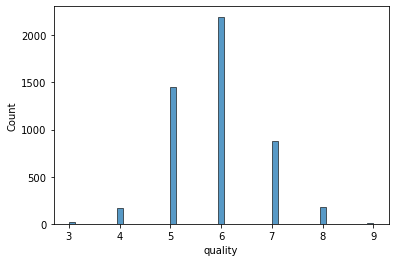

In [44]:
sns.histplot(df_wine['quality']);#kde=True 

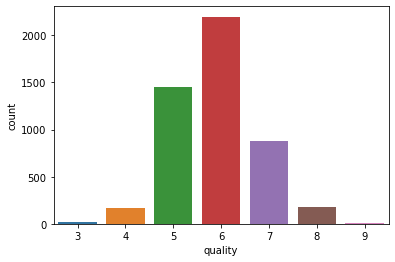

In [45]:
sns.countplot(data=df_wine, x=df_wine['quality']);

2) Verifique se há outliers nas variáveis

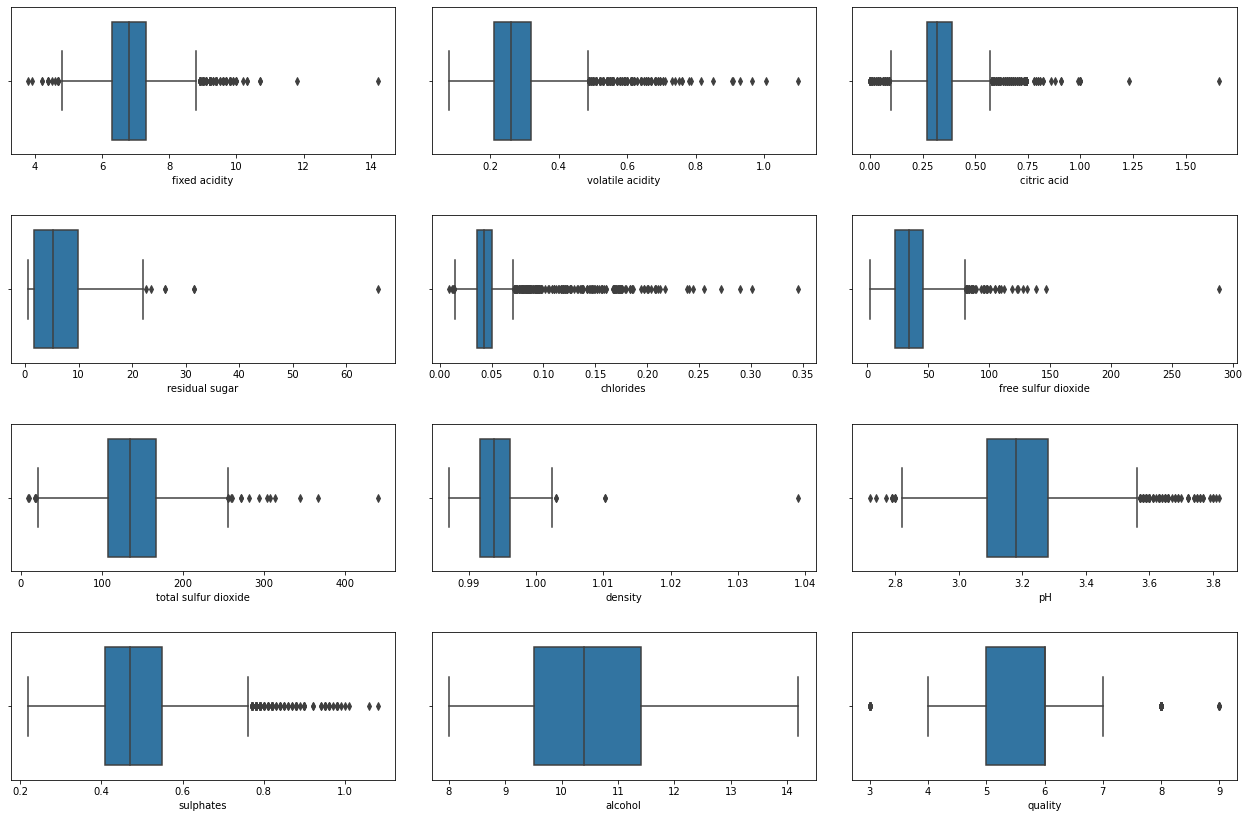

In [46]:
fig, ax = plt.subplots(4,3, figsize=(18,12))
cont = 0
for i in range(4):
    for j in range(3):
        sns.boxplot(data=df_wine, x=df_wine.columns[cont], ax=ax[i][j])
        cont += 1
fig.tight_layout(pad=3)

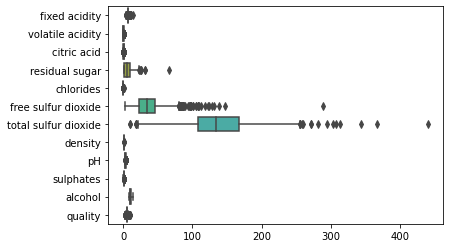

In [47]:
sns.boxplot(data=df_wine, orient = "h");

3) Construa um gráfico que permita verificar se há relação entre cada uma das variáveis retirando a qualidade dos vinhos (quality)

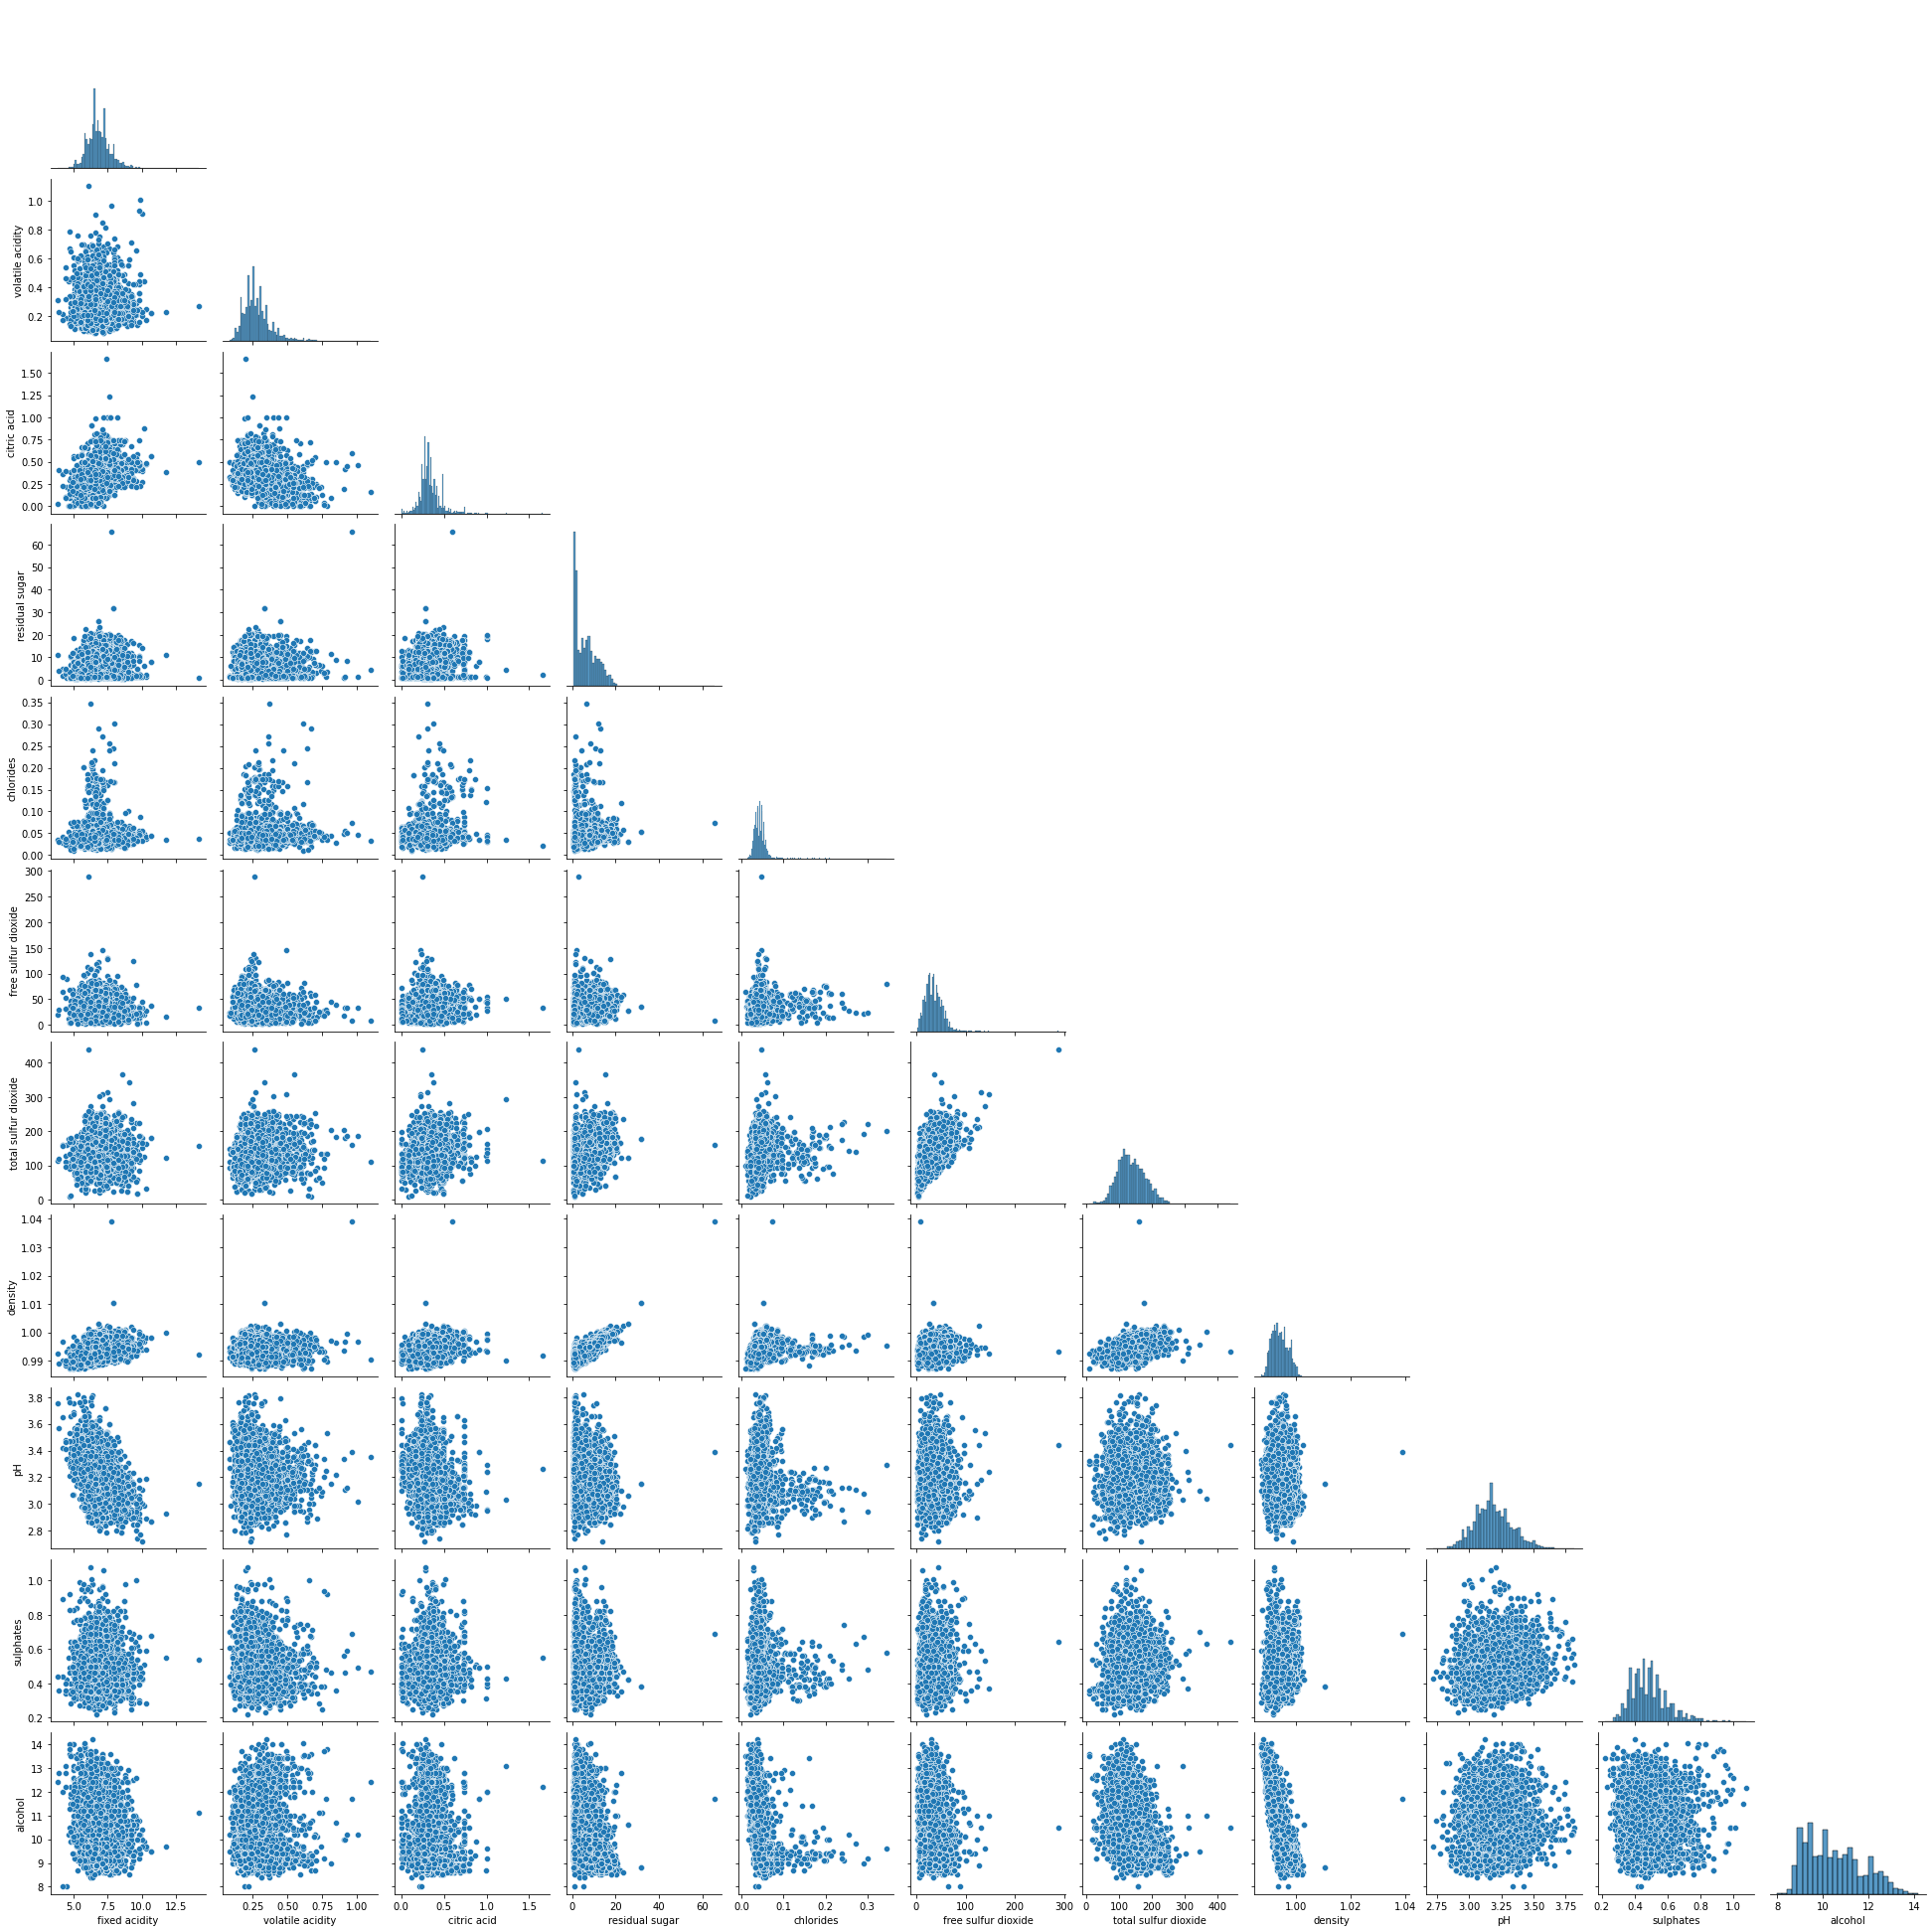

In [48]:
sns.pairplot(data=df_wine.drop('quality', axis=1), corner=True);
# é util porém nem sempre o mais adequado, pois dificulta a leitura

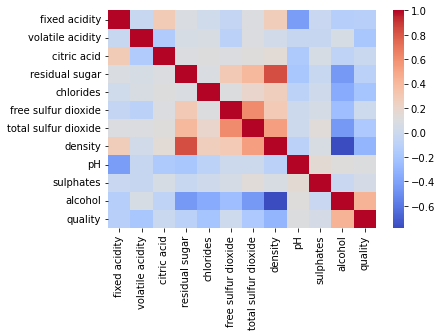

In [49]:
#cmap = 'RdYlBu', RdYlBu_r
sns.heatmap(df_wine.corr(), cmap='coolwarm',);

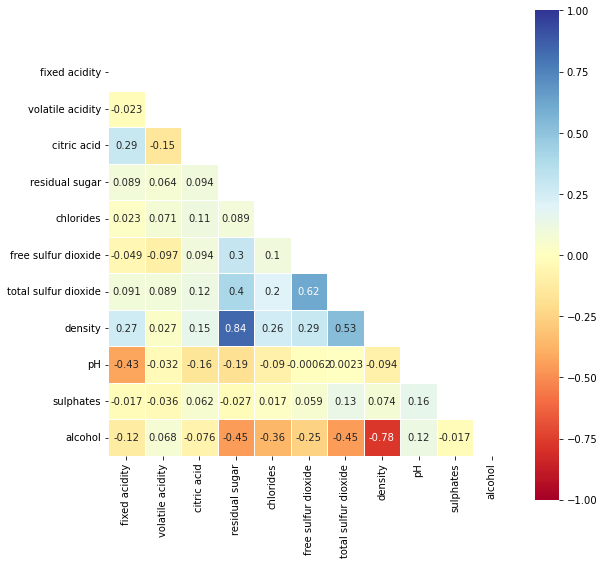

In [50]:
temp = df_wine.drop(columns=['quality'])
mask = np.triu(np.ones_like(temp.corr(), dtype=bool))

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(temp.corr(), annot = True, fmt='.2g', vmin=-1, vmax=1, center=0,
            cmap= 'RdYlBu', square=True, linewidths=.5, mask=mask);

4) Dê um "zoom" na relação entre as características de densidade e açúcar residual, visto que aparentam ter alta relação. Insira também neste gráfico a variável de qualidade, a fim de verificar se há grupos claramente separados por estas duas características.

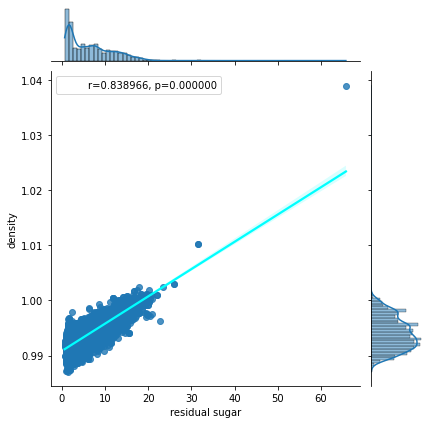

In [51]:
import scipy.stats as stats
g=sns.jointplot(data=df_wine, x="residual sugar", y="density", kind="reg", joint_kws={'line_kws':{'color':'cyan'}})
r, p=stats.pearsonr(df_wine["residual sugar"], df_wine["density"])
phantom,=g.ax_joint.plot([], [], linestyle="", alpha=0)
g.ax_joint.legend([phantom],["r={:f}, p={:f}".format(r, p)])

(0.0, 25.0)

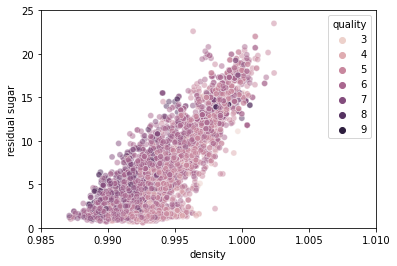

In [52]:
sns.scatterplot(data=df_wine,x='density', y='residual sugar', hue='quality', alpha = 0.5);
plt.xlim(0.985, 1.01)
plt.ylim(0, 25)

5) Baseado no gráfico acima, foi possíve identificar uma relação forte entre as variáveis density e residual sugar. Construa gráficos de barras para verificar a relação da média de cada uma destas características com a qualidade do vinho.

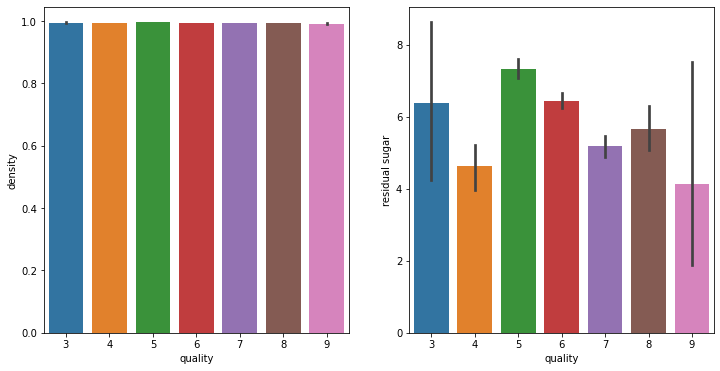

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.barplot(data=df_wine,x='quality', y='density', ax = ax[0])
sns.barplot(data=df_wine,x='quality', y='residual sugar', ax = ax[1]);

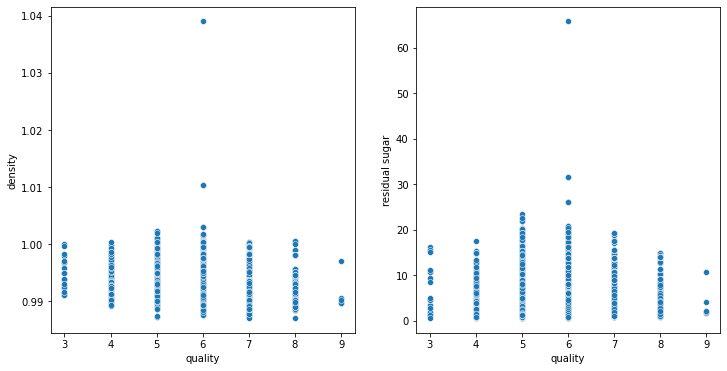

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=df_wine,x='quality', y='density', ax = ax[0])
sns.scatterplot(data=df_wine,x='quality', y='residual sugar', ax = ax[1]);

C:\Users\Paulo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Paulo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 94.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Paulo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 96.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Paulo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Paulo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 68.6% of the points

<AxesSubplot:xlabel='quality', ylabel='density'>

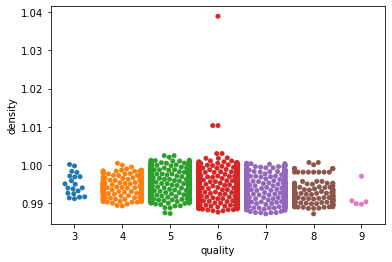

In [55]:
sns.swarmplot(data=df_wine,x='quality', y='density')

6) Construa gráficos de relação entre todas as variáveis, porém agora insira a variável de qualidade a fim de verificar se é possível separar os grupos.  
Obs.: utilize o pairplot

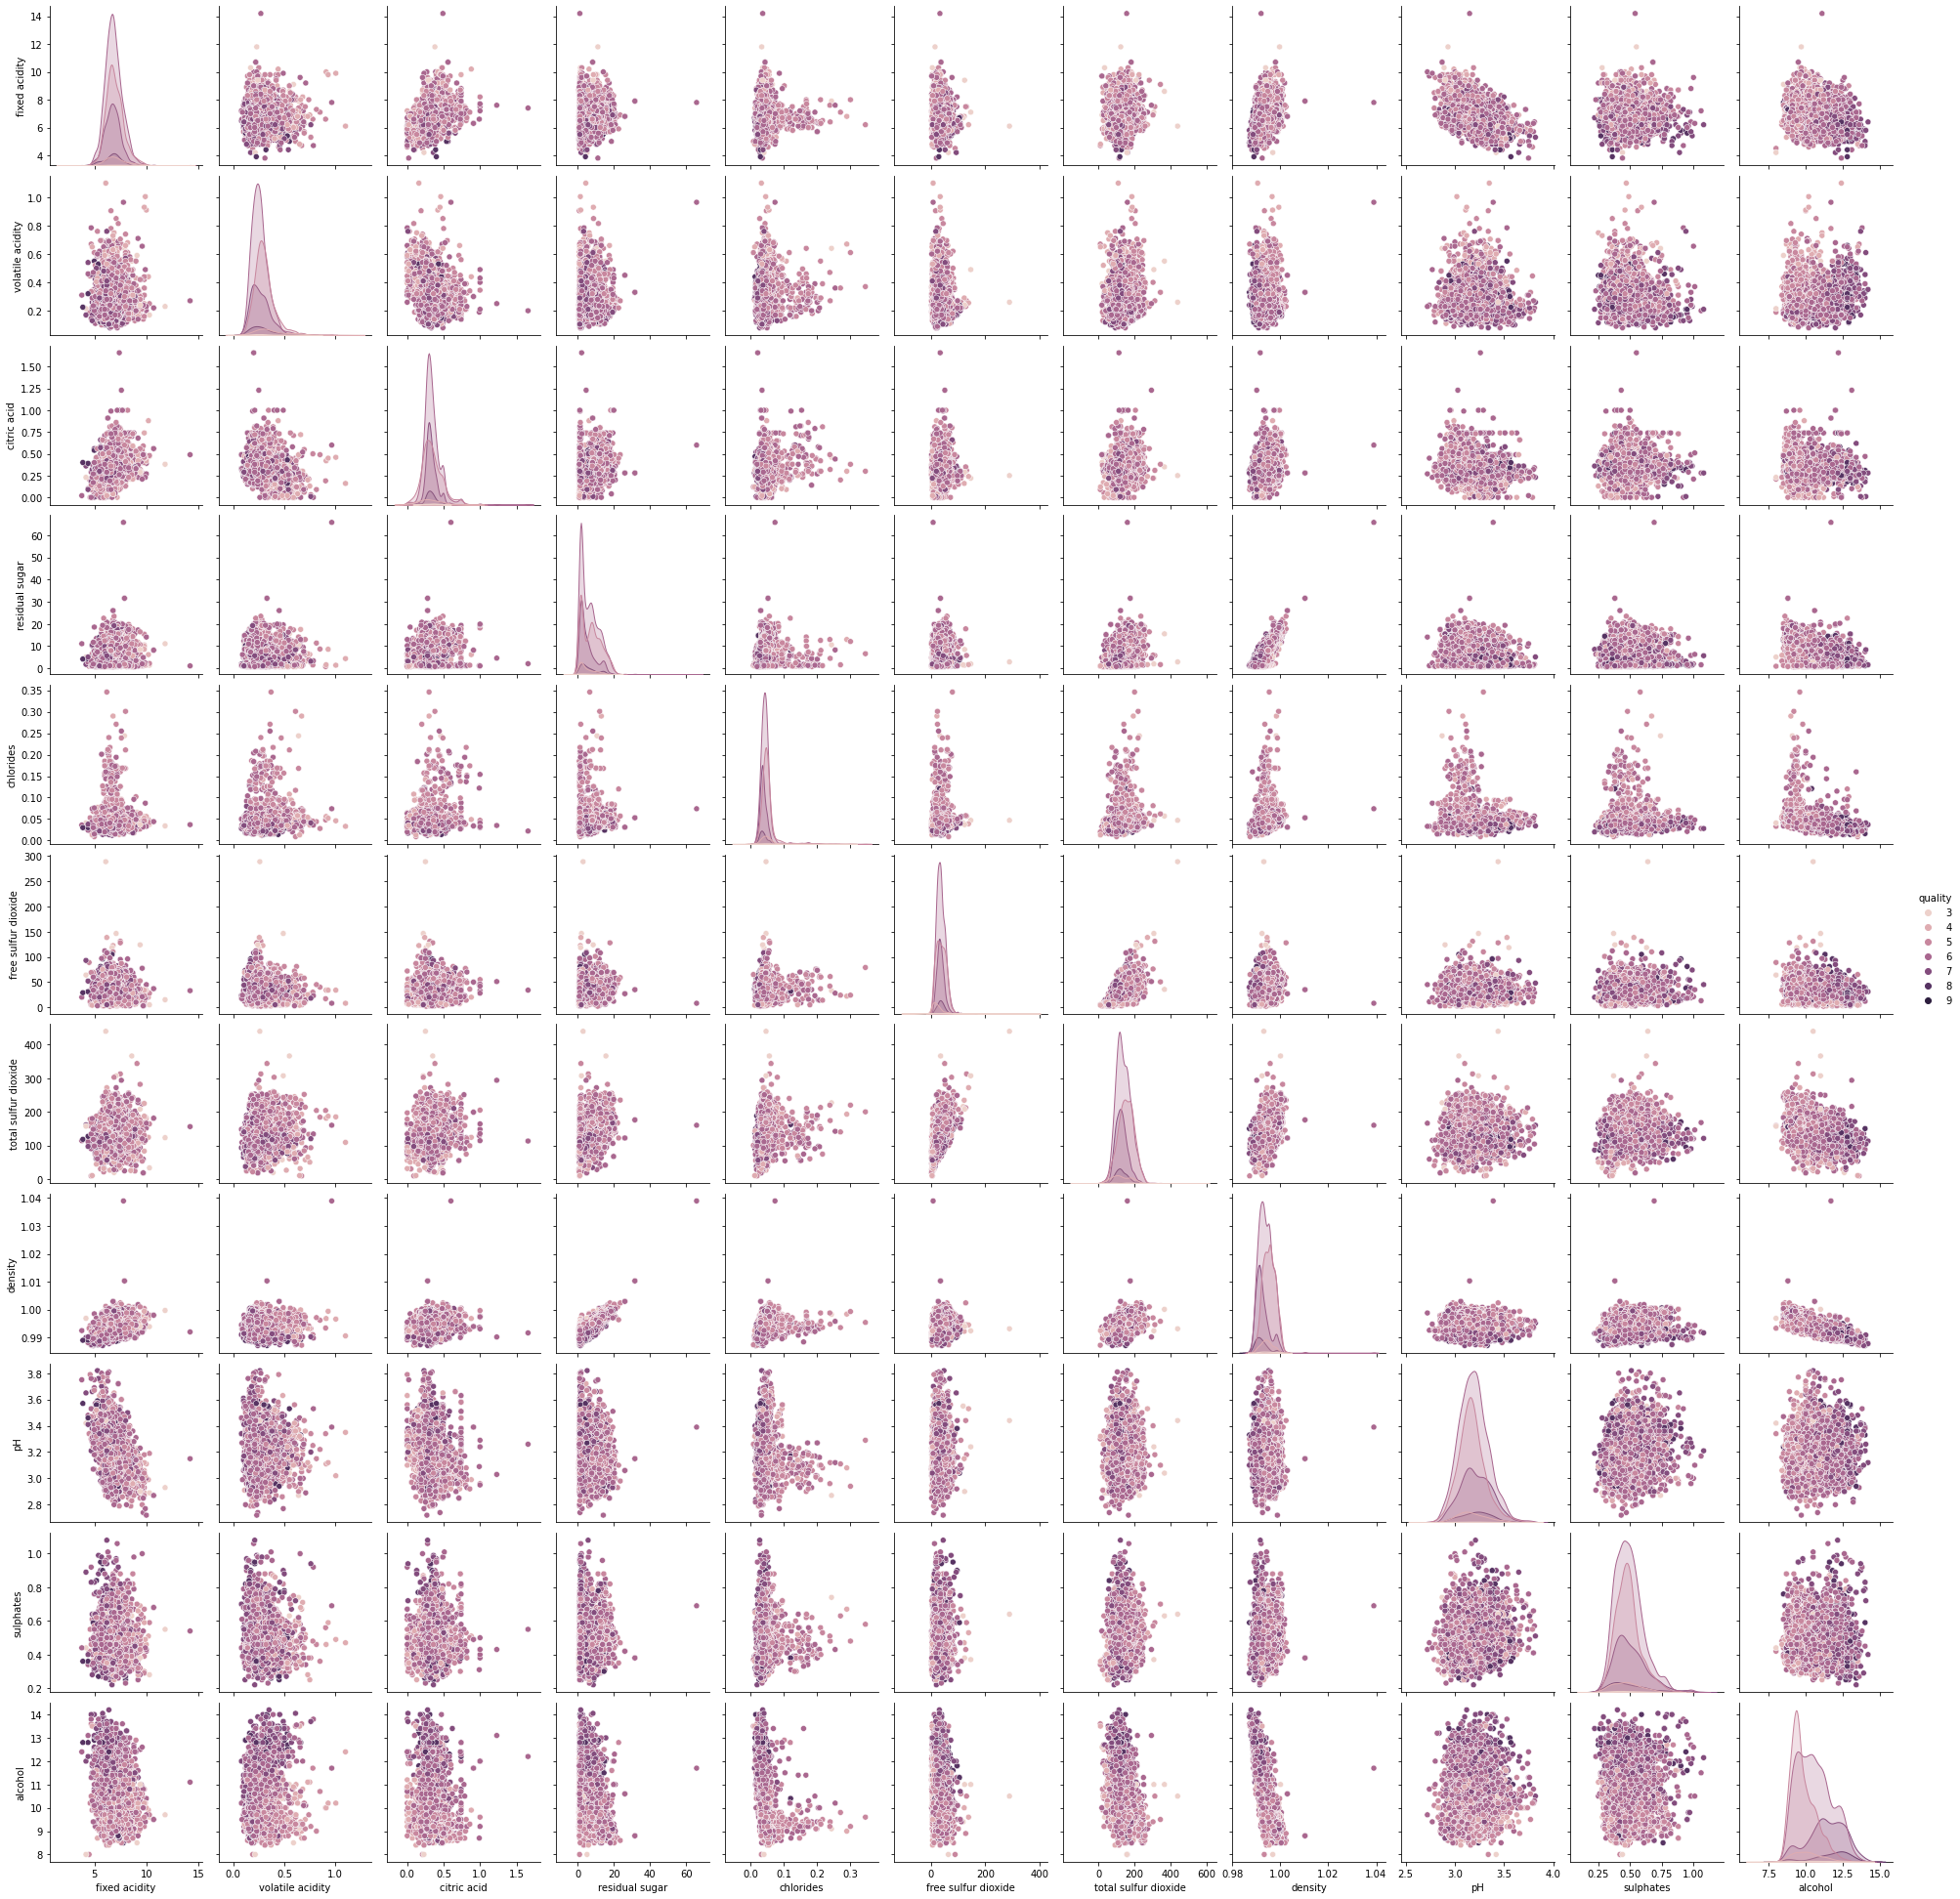

In [56]:
sns.pairplot(data=df_wine, 
             x_vars=df_wine.drop('quality', axis=1), 
             y_vars=df_wine.drop('quality', axis=1), 
             hue='quality' );